#Discount Analysis

This work book has two sections, basic discount analysis (setting up discount analysis) and after catagories were made (Working with catagories  - that was done in the 'Practical Catagories Work Book'

However, this work does use mostly all the same data to run its analysis except for the product_brand catagories that comes from the work after the catagoires work book.


In [4]:
import pandas as pd
import seaborn as sns



In [5]:
# orders_qu.csv
url = "https://drive.google.com/file/d/1aknK8uNpCzZa3f0mCmk0CDABL8rsAdcj/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

In [6]:
# orderlines_qu.csv
url = "https://drive.google.com/file/d/1auRMwpNfS8z-q_s8WnaRsjYOBwPsmU3w/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

In [7]:
# products_brand_catagories.csv
url = "https://drive.google.com/file/d/1DzEoJw8ixEsjcJVM0lsgOWJCULv4iJkI/view?usp=drive_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_brand_cat = pd.read_csv(path)

In [ ]:
orders.shape[0]/226909, orderlines.shape[0]/293983, products_brand_cat.shape[0]/19326

(0.18282218863068456, 0.18410928523077866, 0.5050191451930043)

In [8]:
# Make changes to data set for ease of use
orders=orders.copy()
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines =orderlines.copy()
orderlines['date'] = pd.to_datetime(orderlines['date'])
products_brand_cat =products_brand_cat.copy()

orderlines = orderlines.rename(columns={
    'id_order': 'order_id',
    'product_quantity': 'product_quantity',  # this one is actually unchanged, so you could remove it
    'sku': 'sku',                            # also unchanged
    'unit_price': 'unit_price',              # unchanged too
    'date': 'processing_date'
})

# Merge quality checked list

products_orderlines = orderlines.merge(products_brand_cat, on = 'sku')
# quick data check products_orderlines.isnull().sum()
products_orderlines.info()
 #we need to change the date to the a date
products_orderlines['processing_date'] = pd.to_datetime(products_orderlines['processing_date'])
#products_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53574 entries, 0 to 53573
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53574 non-null  int64         
 1   product_quantity  53574 non-null  int64         
 2   sku               53574 non-null  object        
 3   unit_price        53574 non-null  float64       
 4   processing_date   53574 non-null  datetime64[ns]
 5   name              53574 non-null  object        
 6   desc              53574 non-null  object        
 7   price             53574 non-null  float64       
 8   in_stock          53574 non-null  int64         
 9   type              53574 non-null  object        
 10  short             53574 non-null  object        
 11  long              53574 non-null  object        
 12  category          53574 non-null  object        
 13  used              53574 non-null  object        
dtypes: datetime64[ns](1), 

My part of the project is to analyse two points



*  How high are the discounts and do they change over time.
*  Are there seasonal patterns in the evolution of sales?


# Setting up discount analysis


1.   Merge quality checked lists
2.   Create new columns named % Discount and Actual Discount
3.   Find the highest actual discount and compare to thier     percentage
4.   Do a timeline comparison - monthly & quarterly
5.   Investigate the the plots





In [9]:
# Merge quality checked list

products_orderlines = orderlines.merge(products_brand_cat, on = 'sku')
# quick data check products_orderlines.isnull().sum()
products_orderlines.info()
#we need to change the date to the a date
products_orderlines['processing_date'] = pd.to_datetime(products_orderlines['processing_date'])
#products_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53574 entries, 0 to 53573
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53574 non-null  int64         
 1   product_quantity  53574 non-null  int64         
 2   sku               53574 non-null  object        
 3   unit_price        53574 non-null  float64       
 4   processing_date   53574 non-null  datetime64[ns]
 5   name              53574 non-null  object        
 6   desc              53574 non-null  object        
 7   price             53574 non-null  float64       
 8   in_stock          53574 non-null  int64         
 9   type              53574 non-null  object        
 10  short             53574 non-null  object        
 11  long              53574 non-null  object        
 12  category          53574 non-null  object        
 13  used              53574 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
# Create Actual discount
products_orderlines['actual discount'] = (products_orderlines['price'] - products_orderlines['unit_price'])
# products_orderlines.sample(10) check point


In [ ]:
# Create Percent Discount
products_orderlines['percent discount'] = ((products_orderlines['actual discount']/products_orderlines['price']).round(2))*100
#products_orderlines.sample(10) check it looks good and makes sense (discounted / base price)round two places then *100

In [ ]:
# look for the highest percentage
products_orderlines['percent discount'].describe() # This shows a min of -212% discount
products_orderlines['actual discount'].describe() # min some was was over charged 174 euros for a product

,actual discount
count,53574.000000
mean,26.092581
std,45.612028
min,-170.990000
25%,5.250000
50%,15.000000
75%,30.990000
max,1320.000000


In [ ]:
# Do a timeline comparison - monthly & quarterly
# Need products created date for this rather than processing date. We can compare those later if need be.
orders_products = products_orderlines.merge(orders, on = 'order_id')
orders_products.info() # need to change created date to a datetime
orders_products['created_date'] = pd.to_datetime(orders_products['created_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53574 entries, 0 to 53573
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          53574 non-null  int64         
 1   product_quantity  53574 non-null  int64         
 2   sku               53574 non-null  object        
 3   unit_price        53574 non-null  float64       
 4   processing_date   53574 non-null  datetime64[ns]
 5   name              53574 non-null  object        
 6   desc              53574 non-null  object        
 7   price             53574 non-null  float64       
 8   in_stock          53574 non-null  int64         
 9   type              53574 non-null  object        
 10  short             53574 non-null  object        
 11  long              53574 non-null  object        
 12  category          53574 non-null  object        
 13  used              53574 non-null  object        
 14  actual discount   5357

<Axes: xlabel='created_date'>

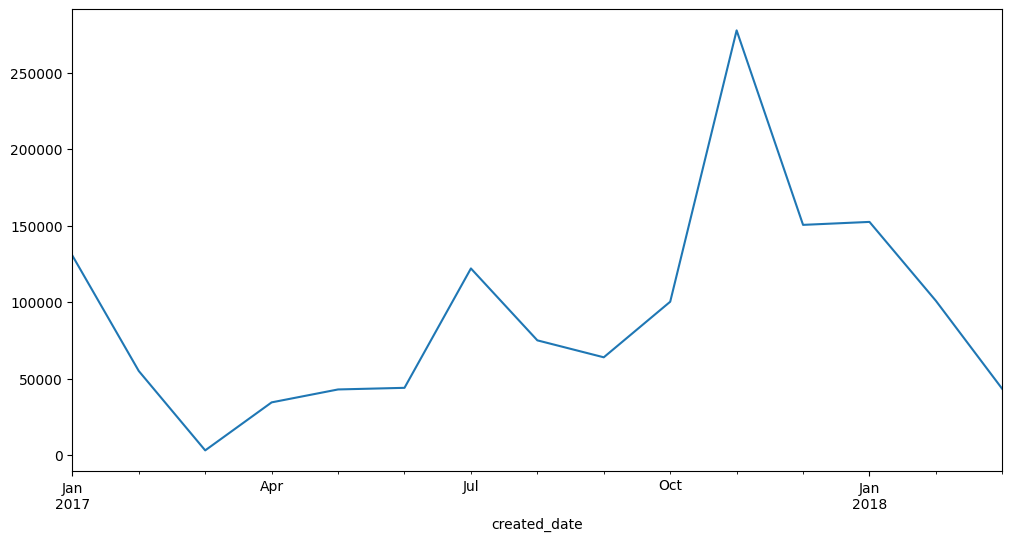

In [ ]:
 # We create discount calculation per discount and total discount per order
 # per order we will groupby order_id and agg the sum


orders_products.resample("ME", on="created_date")["actual discount"].sum().plot(figsize=(12,6))
# This is the sum of all discounts over a months time -- we need to compare with revenue as well


/tmp/ipython-input-3251263779.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  orders_products.resample("Q", on="created_date")


<Axes: xlabel='created_date'>

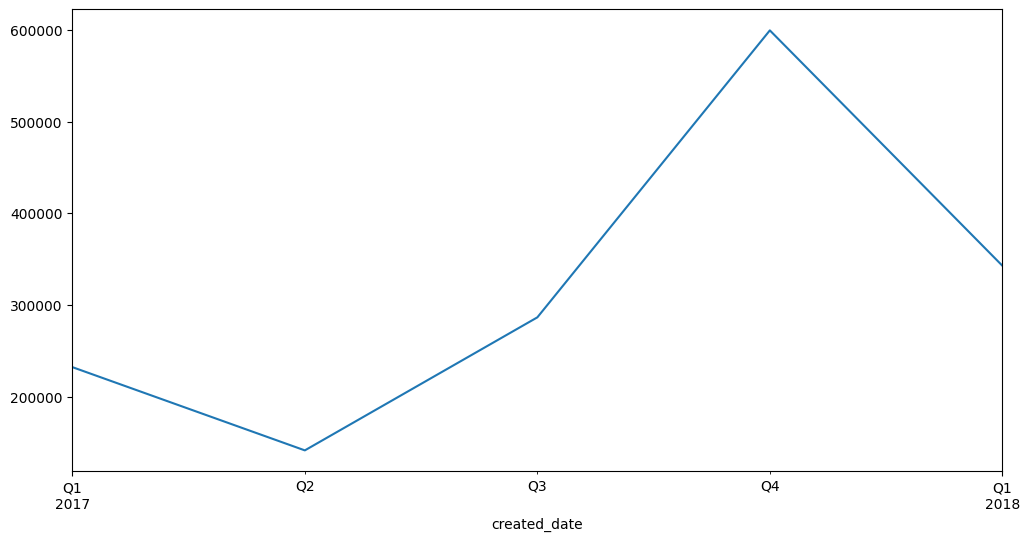

In [ ]:
# Quarter discount

orders_products["quarter"] = orders_products["created_date"].dt.to_period("Q")

(
orders_products.groupby("quarter")["actual discount"]
    .sum().sort_values(ascending=False)
    )
(
orders_products.resample("Q", on="created_date")
    ["actual discount"]
    .sum().plot(figsize=(12,6))
)
# This is the sum of all discounts over 6 different quarters time we see the same large increase in discounts during the 4th quarter
# this can be seen around Nov-Dec thinking Black Friday or Pre-christmas shopping.





/tmp/ipython-input-3865362305.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  orders_products.resample("Q", on="created_date")


<Axes: xlabel='created_date'>

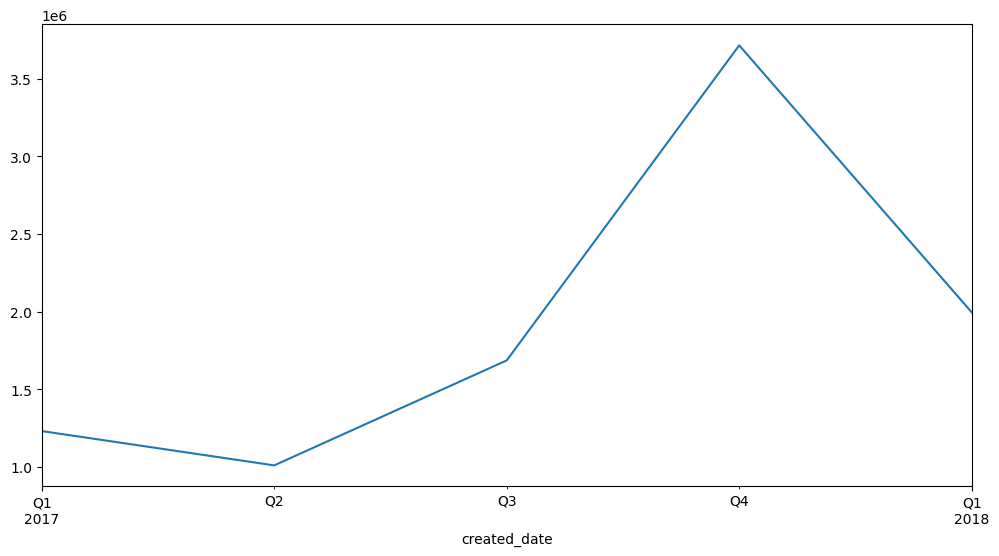

In [ ]:
# Create a revenue column to compare the overall made. multiplying the unit price by the quantity.
# This is the optimal becuase this was the base price not the discounted price
orders_products["optimal_revenue"] = orders_products["price"] * orders_products["product_quantity"]

(
orders_products.resample("Q", on="created_date")
    ["optimal_revenue"]
    .sum().plot(figsize=(12,6))
)



/tmp/ipython-input-3444231930.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  orders_products.resample("Q", on="created_date")


<Axes: xlabel='created_date'>

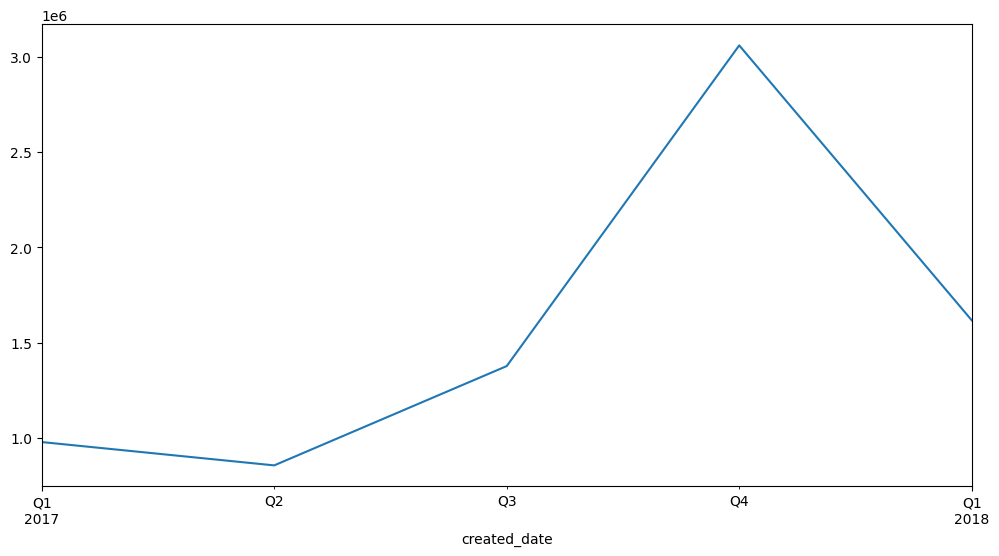

In [ ]:

# optimal revenue which we can compare with the actual revenue --
orders_products["real_revenue"] = orders_products["unit_price"] * orders_products["product_quantity"]

(
orders_products.resample("Q", on="created_date")
    ["real_revenue"]
    .sum().plot(figsize=(12,6))
)

# intresting no real difference

In [ ]:
# Comparing numbers

orders_products['real_revenue'].sum(),
orders_products['optimal_revenue'].sum()

discount_losses = orders_products['optimal_revenue'].sum()- orders_products['real_revenue'].sum()
discount_losses # 1,753,264.30 Euros are removed from sales.

np.float64(1753264.3099999996)

Okay so we do see a seasonal change with the discount showing holidays increase the purchases but also revenues

But now I have more questions
1.  What is causing the dip in sales in April? because it looks like less discounts means less sales
2.  How can we see if the discounts are worth the sales?
3.  When are the discounts the highest?

In [ ]:
# isolation april or Q2 sales

(
orders_products.resample("Q", on="created_date", )
    ["real_revenue"]
    .sum().plot(figsize=(12,6))
)

# Working with Catagories.

We are working under the assumption that the discount drives sales we will work with that as out indepdent asumption. Also keeping in mind a few other factors and simple calculations.

*Main concerns*
 - Removing discounts would hurt customer retention, and aquisitions
 - We have too many discounts and that does not reflect the quality of our products

 *Question I wish to answer*
 1. Highest order total revenue - and its discount
 2. In orders what was the highest discount of an order, what was it's total revenue?
 3. Average discount per product catagory(could be done with box plot to see outliers)
    - is there a different between used and new discounts and revenue?
 4.  What is the average discount each month for used and new products?



In [10]:
# Create Actual discount
products_orderlines['discount'] = (products_orderlines['price'] - products_orderlines['unit_price'])
# products_orderlines.sample(10) check point

products_orderlines['total_discount'] = products_orderlines['discount'] * products_orderlines['product_quantity']

# Create Percent Discount
products_orderlines['percent_discount'] = ((products_orderlines['discount']/products_orderlines['price']).round(2))*100
#products_orderlines.sample(10) check it looks good and makes sense (discounted / base price)round two places then *100

# Create optimal revenue - this is the base price of the product not what it was sold at.
products_orderlines["optimal_revenue"] = products_orderlines["price"] * products_orderlines["product_quantity"]


# This is the revenue it was sold at with the discounted price on any certain day.
products_orderlines["real_revenue"] = products_orderlines["unit_price"] * products_orderlines["product_quantity"]

In [ ]:
products_orderlines = products_orderlines.copy()

# 1.Highest order total revenue - and its discount

In [ ]:
# largest revenue of an order and discount
(
products_orderlines.groupby('order_id')
    .agg({"real_revenue":'sum','optimal_revenue':'sum', 'percent_discount':'max'})
    .nlargest(60, columns = 'real_revenue' )
)

# We see that high revenue per order is not reliant on a high discount

,real_revenue,optimal_revenue,percent_discount
order_id,,,
434662,6876.80,7999.68,14.0
499191,6839.88,7188.00,5.0
388292,5799.80,7439.80,22.0
364878,4493.82,4761.54,6.0
403104,4479.92,4792.00,7.0
355941,4424.00,4639.67,5.0
435746,3825.09,5399.73,29.0
417672,3541.92,4599.92,23.0
442739,3391.42,4354.52,23.0


# 2.In orders what was the highest discount of an order, what was it's total revenue?

In [ ]:
# largest discount  of an order and total revenue

(
products_orderlines.groupby('order_id')
    .agg({"real_revenue":'sum','optimal_revenue':'sum', 'percent_discount':'max'})
    .nlargest(10, columns = 'percent_discount' )
)

# We see that we have large discount that results in very low revenues
# Next would be to see how many orders have discounts over 75%

,real_revenue,optimal_revenue,percent_discount
order_id,,,
512862,4.00,139.90,97.0
256799,7.98,139.90,94.0
511204,12.48,169.89,94.0
512444,9.98,179.90,94.0
512522,7.98,139.90,94.0
512530,9.98,179.90,94.0
512531,7.98,139.90,94.0
512536,7.98,139.90,94.0
512556,9.98,179.90,94.0


In [ ]:
# How many orders have a discount over 75%

# used this to check different percentages
high_discount = products_orderlines['percent_discount'] >= 75


products_orderlines.loc[high_discount].count()/products_orderlines.shape[0]
# looks like over 75% is 1% of sales
# 60 + is 5% of sales
# 50% + is 9% of sales

# Discounts at 30 and lower are about 78% of sales.

,0
order_id,0.780229
product_quantity,0.780229
sku,0.780229
unit_price,0.780229
processing_date,0.780229
name,0.780229
desc,0.780229
price,0.780229
in_stock,0.780229
type,0.780229


# 3.Average discount per product catagory

(could be done with box plot to see outliers)
 is there a different between used and new discounts and revenue?

In [11]:
# Basic Table view
average_discount_category=(products_orderlines.groupby('category')
    .agg({'percent_discount':'mean'})
)

total_revenue_category=(products_orderlines.groupby('category')
    .agg({'real_revenue':'sum',})
    ).reset_index()

total_revenue_category

,category,real_revenue
0,Accessories,1270438.23
1,Computer,719777.90
2,Hardware_and_Upgrades,3181485.18
3,Mobile_devices,2579236.04
4,Other,20072.87
5,Repairs_and_products,74645.66


In [12]:
average_discount_category = average_discount_category.reset_index()

In [13]:
(products_orderlines.groupby('used')
    .agg({'percent_discount':'mean', 'real_revenue':'sum',})
    .sort_values('real_revenue', ascending = False)
)

,percent_discount,real_revenue
used,,
new,21.021416,7339590.73
used,29.868083,506065.15


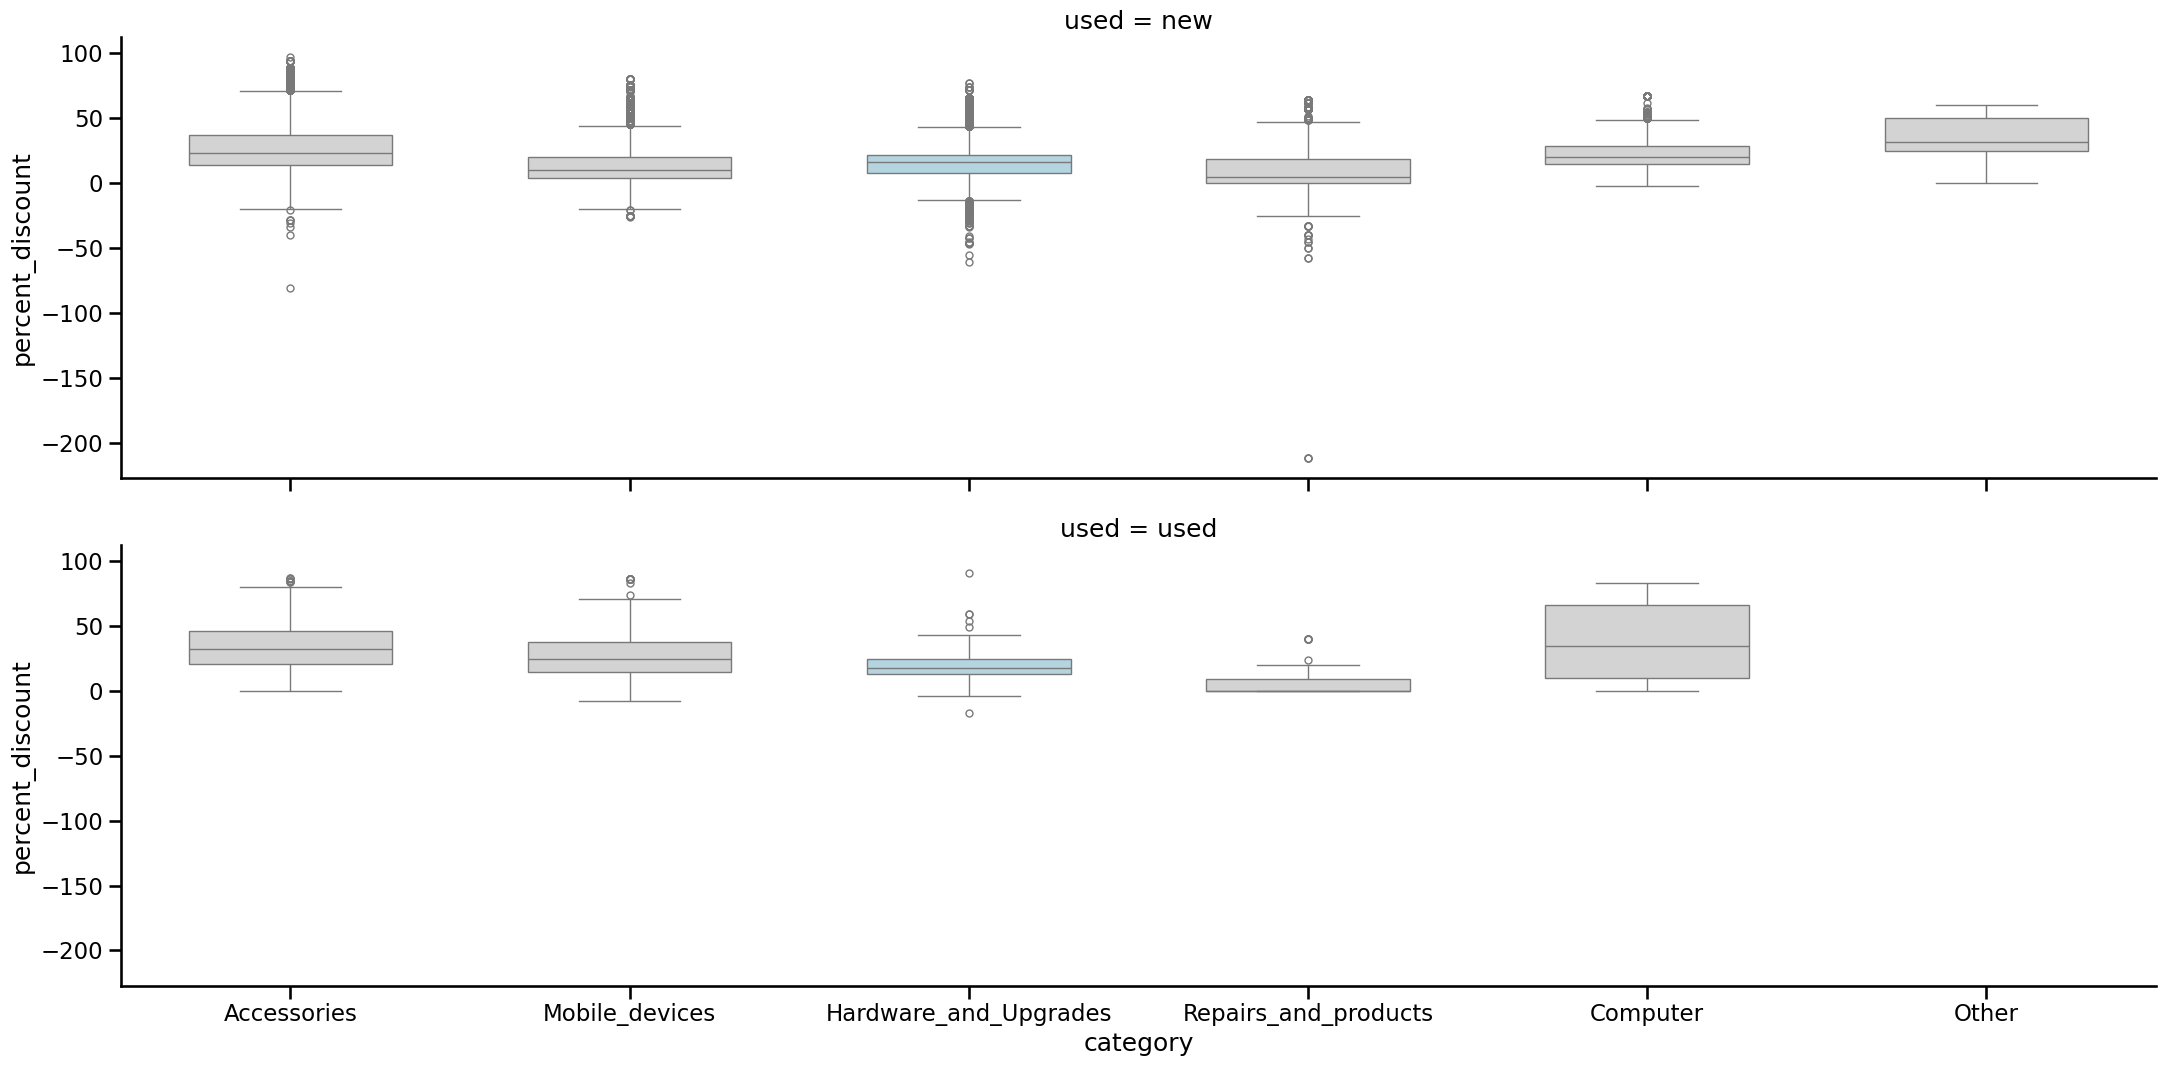

In [14]:
sns.set_context("talk")
category_colors = {day: "lightblue" if day =='Hardware_and_Upgrades' else "lightgray" for day in products_orderlines["category"].unique()}

tips_chart = sns.catplot(
    kind="box",
    data=products_orderlines,
    x="category",
    y="percent_discount",
    row ='used',
    height=5.5,
    aspect=4,
    hue="category",
    palette=category_colors,
    width= .6
   )

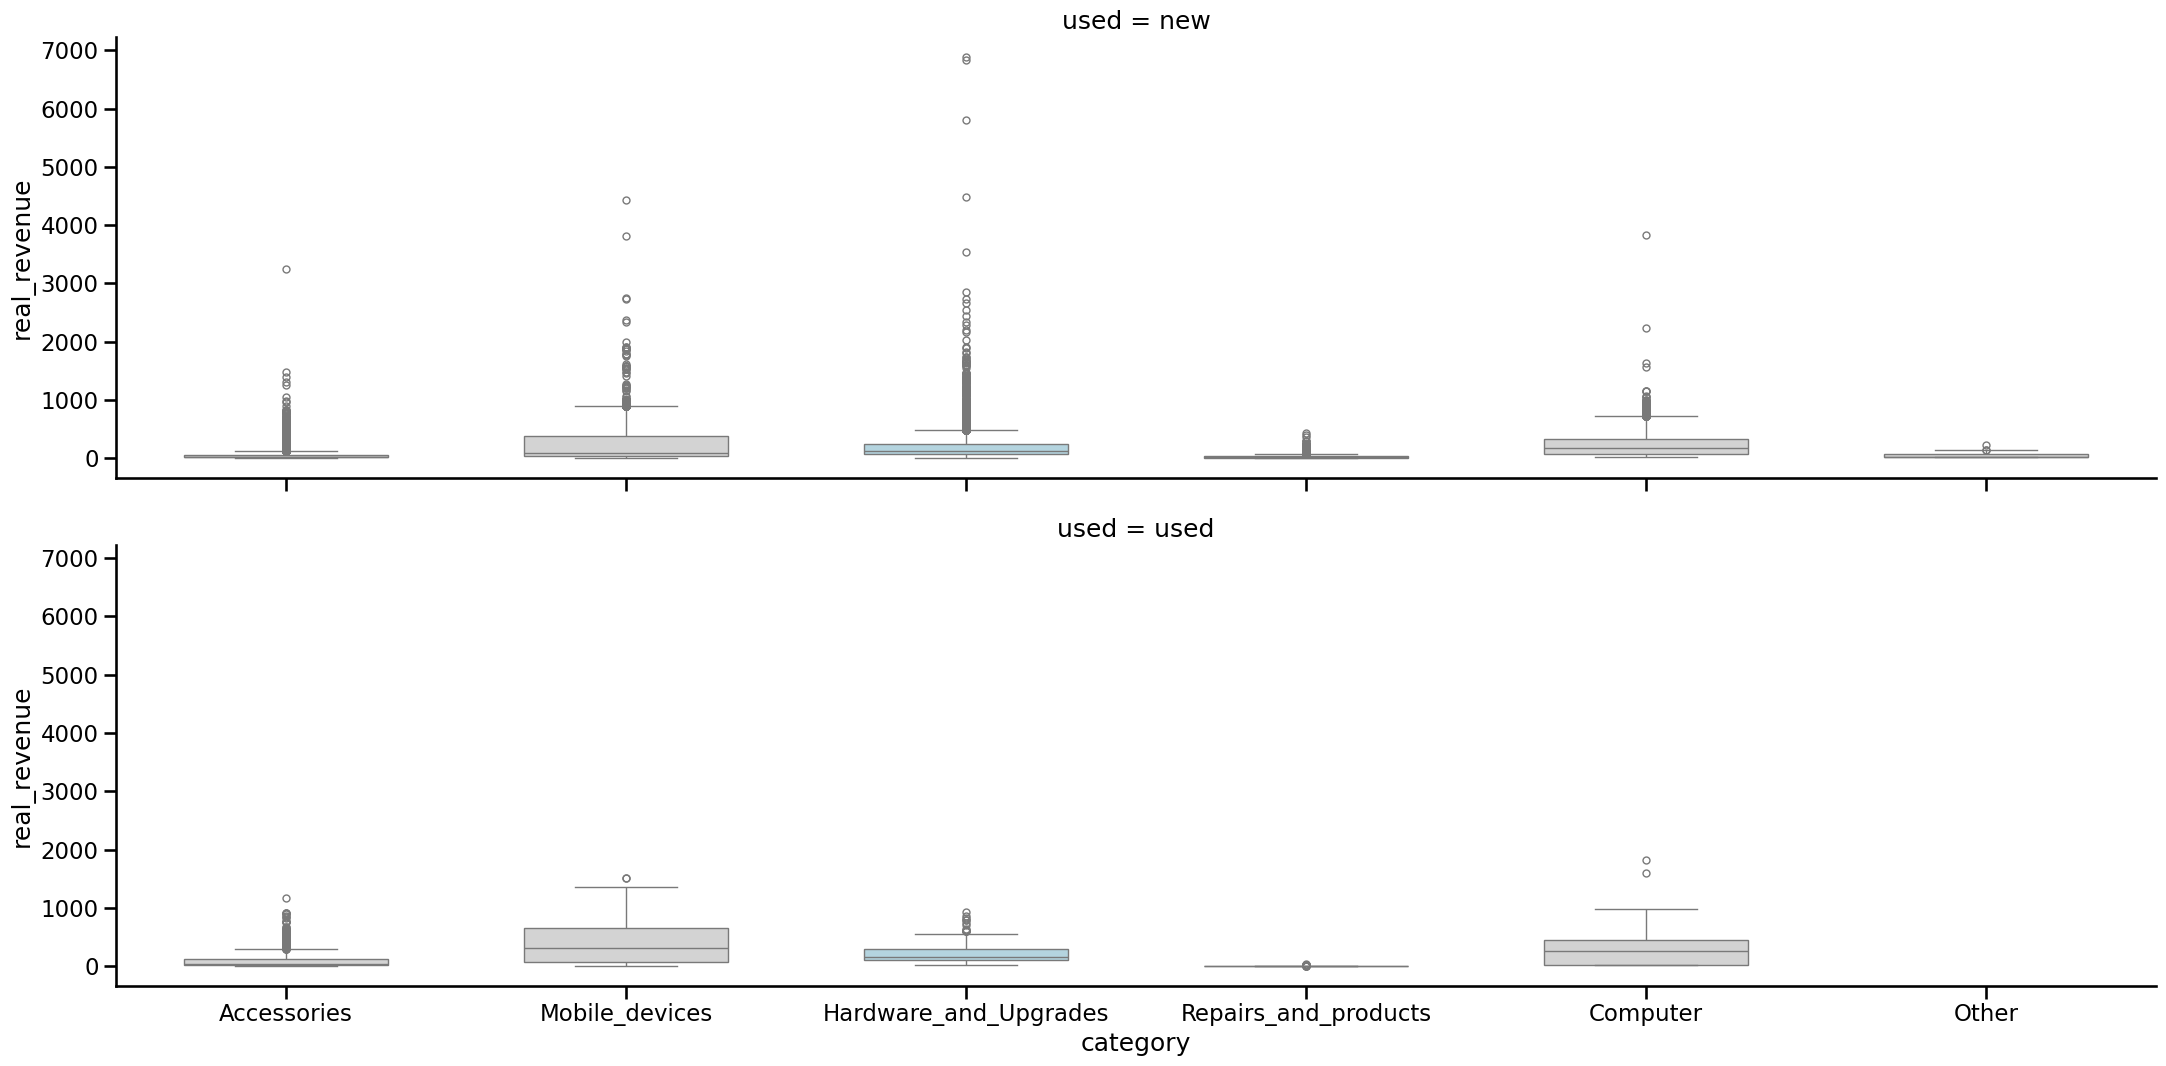

In [15]:
sns.set_context("talk")
category_colors = {day: "lightblue" if day =='Hardware_and_Upgrades' else "lightgray" for day in products_orderlines["category"].unique()}

tips_chart = sns.catplot(
    kind="box",
    data=products_orderlines,
    x="category",
    y="real_revenue",
    row ='used',
    height=5.5,
    aspect=4,
    hue="category",
    palette=category_colors,
    width= .6
   )

/tmp/ipython-input-3734174563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  revenue_per_product = sns.catplot(


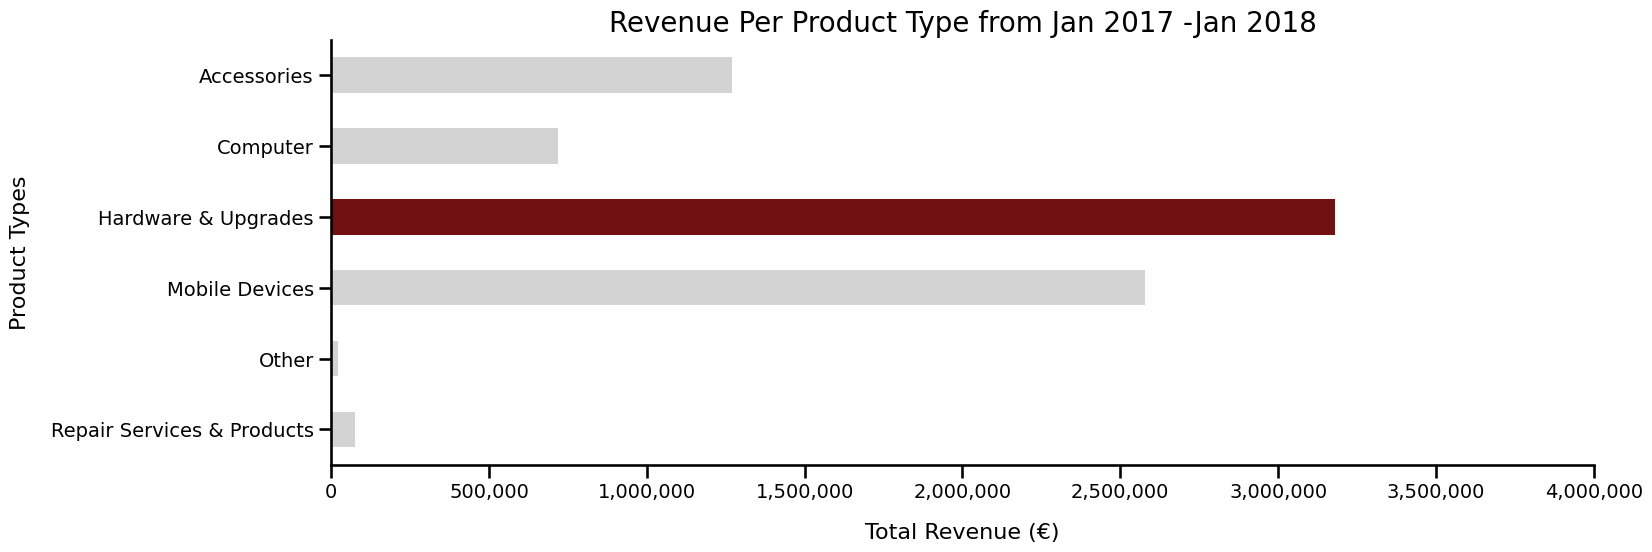

In [17]:
# Seaborn graphing using boxplot
sns.set_context("talk")

product_colors = ({catagory: "maroon" if catagory =='Hardware_and_Upgrades'
                     else "lightgray" for catagory in total_revenue_category["category"]
                     .unique()})

revenue_per_product = sns.catplot(
    kind="bar",
    data=total_revenue_category,
    y="category",
    x="real_revenue",
    height=5.5,
    aspect=3,
    palette=product_colors,
    width=0.5
)

revenue_per_product.ax.set_title('Revenue Per Product Type from Jan 2017 -Jan 2018',
    fontsize=20
    )

revenue_per_product.set_axis_labels(
    "Total Revenue (€)",
    "Product Types",
    fontsize=16,
    labelpad=15 # move the labels slightly away from the ticks
    )

revenue_per_product.ax.set_xticks( # show different xticks
    ticks=[0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],
    labels=['0','500,000','1,000,000','1,500,000','2,000,000','2,500,000','3,000,000','3,500,000','4,000,000'],
    fontsize=14
    )

revenue_per_product.ax.set_yticks(
    ticks=['Accessories','Computer', 'Hardware_and_Upgrades', 'Mobile_devices', 'Other', 'Repairs_and_products'],
    labels = ['Accessories','Computer', 'Hardware & Upgrades', 'Mobile Devices', 'Other', 'Repair Services & Products'],
    fontsize=14
)


revenue_per_product.savefig("Product_revenue.png")

#4.What is the average discount each month for used and new products?

Check weekly to see more granular results.

In [19]:
monthly_orders = products_orderlines.resample("ME", on="processing_date").agg({"percent_discount": "mean", "order_id": "nunique"})

weekly_orders = products_orderlines.resample("W", on="processing_date").agg({"percent_discount": "mean", "order_id": "nunique"})

daily_orders = products_orderlines.resample("D", on="processing_date").agg({"percent_discount": "mean", "order_id": "nunique"})



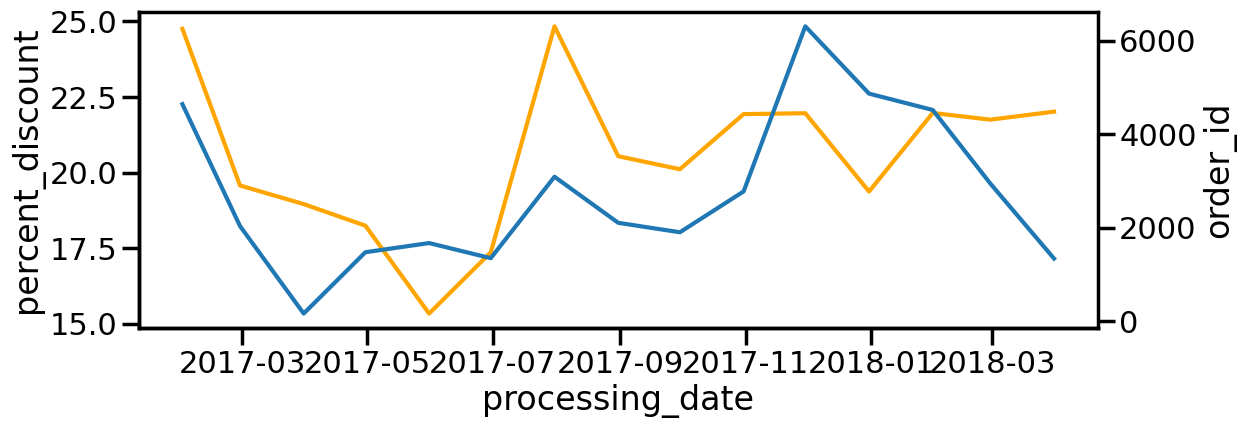

In [ ]:
fig = sns.relplot(height=4.5, aspect=2.5)
sns.lineplot(data=monthly_orders,
    x="processing_date",
    y="percent_discount",
    c="orange", ax=fig.ax)
ax2 = fig.ax.twinx()

sns.lineplot(data=monthly_orders,
    x="processing_date",
    y="order_id",
    ax=ax2);


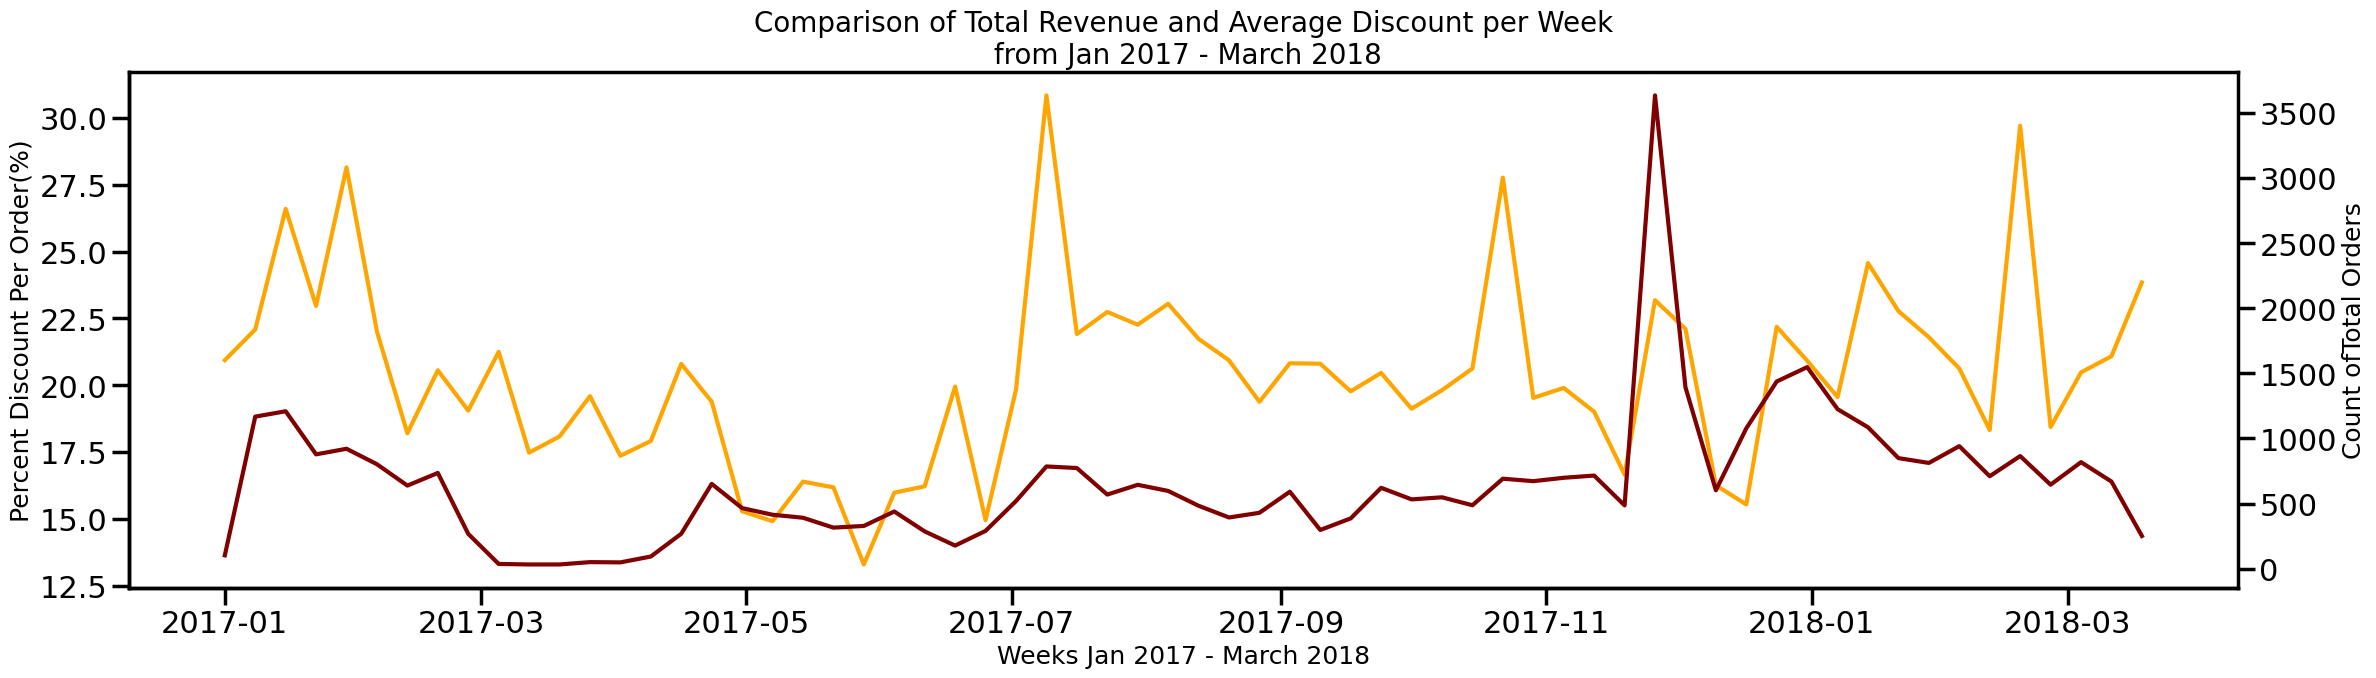

In [20]:
sns.set_context("poster")

sns.color_palette("flare", as_cmap=True)

fig = sns.relplot(height=6.5, aspect=3.5)

sns.lineplot(data=weekly_orders,
    x="processing_date",
    y="percent_discount",
    c="orange", ax=fig.ax)

ax2 = fig.ax.twinx()
sns.lineplot(data=weekly_orders,
    x="processing_date",
    y="order_id",
    c ='maroon', ax=ax2)

#titles
fig.ax.set_title("Comparison of Total Revenue and Average Discount per Week\n from Jan 2017 - March 2018",
    fontsize=20
)

fig.ax.set_xlabel("Weeks Jan 2017 - March 2018", fontsize=18)
fig.ax.set_ylabel("Percent Discount Per Order(%)", fontsize=18)
ax2.set_ylabel("Count ofTotal Orders", fontsize=18)

fig.savefig("weekly_comparison.png")

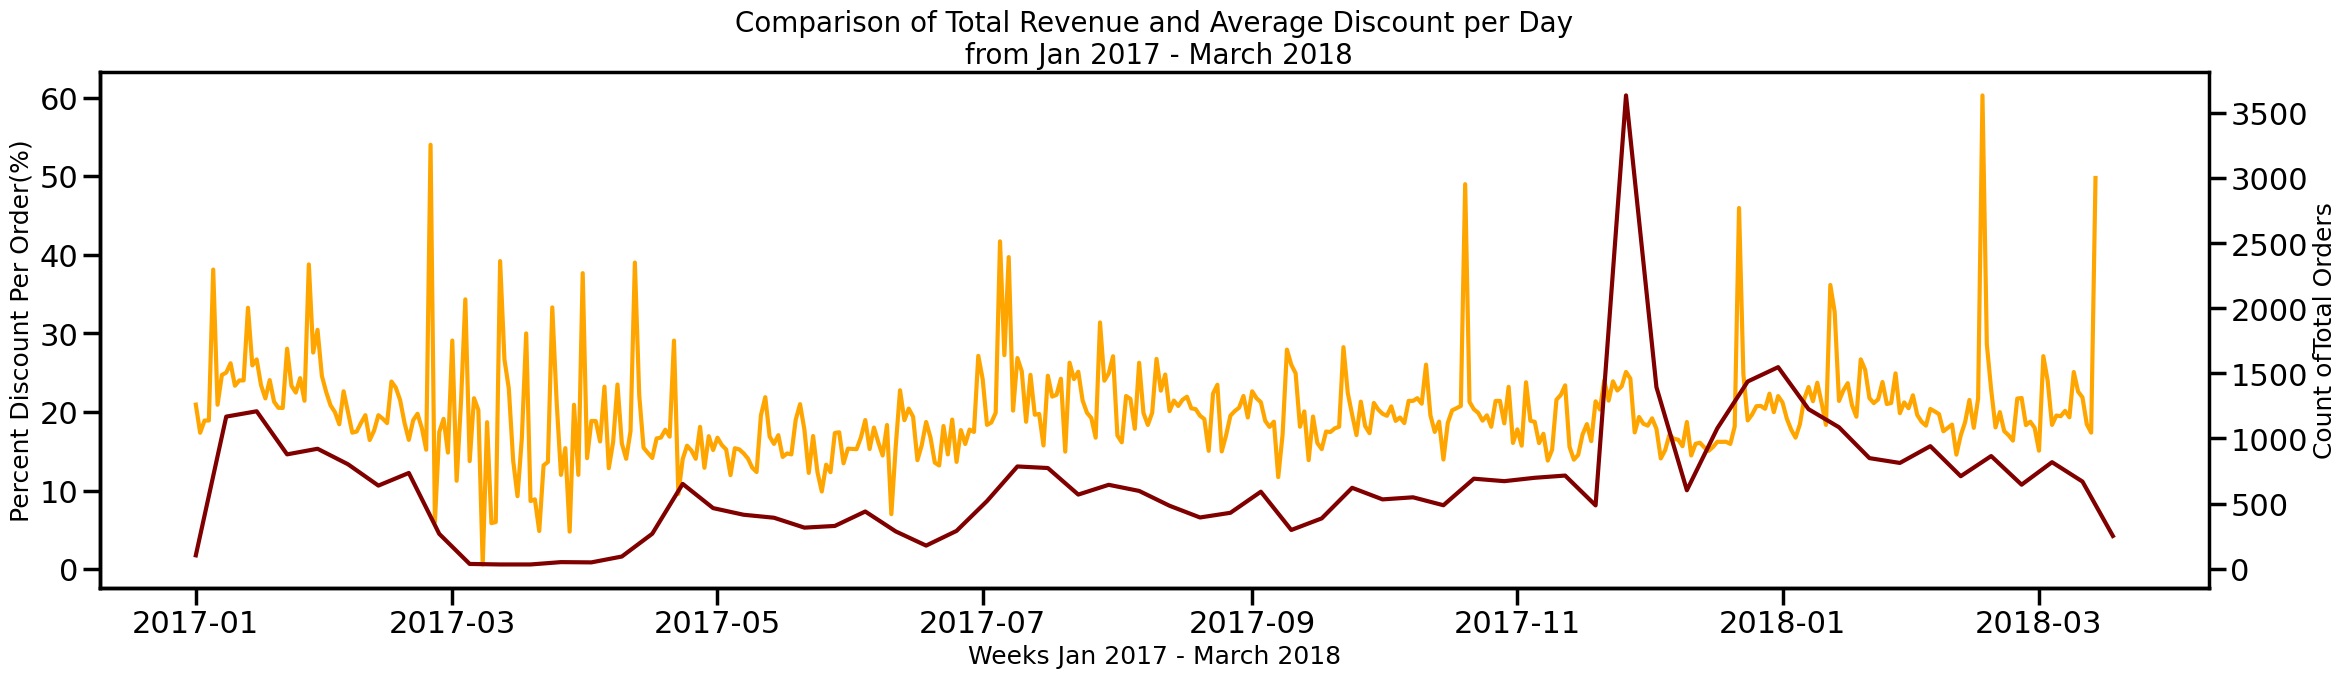

In [ ]:
#Daily

sns.set_context("poster")

sns.color_palette("flare", as_cmap=True)

fig = sns.relplot(height=6.5, aspect=3.5)

sns.lineplot(data=daily_orders,x="processing_date",
    y="percent_discount",
    c="orange", ax=fig.ax)

ax2 = fig.ax.twinx()
sns.lineplot(data=weekly_orders,
    x="processing_date",
    y="order_id",
    c ='maroon', ax=ax2)

#titles
fig.ax.set_title(
    "Comparison of Total Revenue and Average Discount per Day\n from Jan 2017 - March 2018",
    fontsize=20
)

fig.ax.set_xlabel("Weeks Jan 2017 - March 2018", fontsize=18)
fig.ax.set_ylabel("Percent Discount Per Order(%)", fontsize=18)
ax2.set_ylabel("Count ofTotal Orders", fontsize=18)

fig.savefig("daily_comparison.png")

In [ ]:
sns.relplot(kind="line",
            data= products_orderlines,
            x='processing_date',
            y='percent_discount',
            row = 'used');